### Download Data

The data is taken from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/, but you can have it in the form of the UCI-HAR-Dataset.zip.

Extract it to the folder of your notebook with the solution (or suitably adjust the paths to training and test data specified below (TRAIN, TEST).  

Spcifically, the split into training and testing data is already done. The dataset contains 7352 training and 2947 test samples.  

Each sample consists of nine timeseries of float values, each of length 128.

The nine timeseries are collected by an accelerometer and a gyroscope that contain information about the motion and the orientation, respectively.

In [49]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load Data

In [50]:
# Useful Constants
TRAIN = "UCI_HAR_Dataset/train/"
TEST = "UCI_HAR_Dataset/test/"

# x-values, 'signals'
# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
X_train_signals_paths = [TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES]
X_test_signals_paths =  [TEST  + "Inertial Signals/" + signal + "test.txt"  for signal in INPUT_SIGNAL_TYPES]


# y-values, 'labels'
#Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]
N_CLASSES = len(LABELS)
y_train_path = TRAIN + "y_train.txt"
y_test_path  = TEST  + "y_test.txt"

In [51]:
# Load "X" (the neural network's training and testing inputs)
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)
print(X_train.shape, X_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [52]:
# Load "y" (the neural network's training and testing outputs)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

def one_hot(y, n_classes):
    y = y.reshape(len(y))
    return np.eye(n_classes)[np.array(y, dtype=np.int32)]

def label_from_onehot(vectors):
    indices = []
    for vector in vectors:
        indices.append(np.argmax(vector))
    return np.array(indices)

Y_train = load_y(y_train_path)
Y_test = load_y(y_test_path)
print(Y_train.shape, Y_test.shape)

(7352, 1) (2947, 1)


In [59]:
# Convert Y to one hot
Y_train = one_hot(load_y(y_train_path), N_CLASSES)
Y_test = one_hot(load_y(y_test_path), N_CLASSES)
print(Y_train.shape, Y_test.shape)

(7352, 6) (2947, 6)


#### Plot some samples

In [53]:
X_train_per_class = {}
for c in range(N_CLASSES):
    mask = ... # select sample of given class c
    X_train_per_class[c] = X_train[mask]

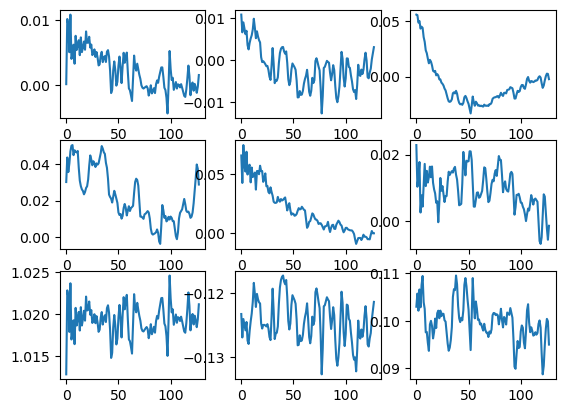

In [54]:
def plot_lines(X, nsamples):
    t = range(128)
    for i in range(9):
        plt.subplot(3,3,i+1)
        for j in range(np.minimum(X.shape[0],nsamples)):
            plt.plot(t,X[j,:,i])
    plt.show()
    
plot_lines(X_train_per_class[1], 1)

In [55]:
# Input Data
training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
means = np.mean(X_train, axis=(0,1))
stdevs = np.std(X_train, axis=(0,1))

print("X shape, Y_shape:")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)

Mean / Stdev for each feature:
-0.0006 |  0.1948
-0.0003 |  0.1224
-0.0003 |  0.1069
 0.0005 |  0.4068
-0.0008 |  0.3819
 0.0001 |  0.2557
 0.8047 |  0.4141
 0.0288 |  0.3910
 0.0865 |  0.3578


### Dataset

If suitable specify Dataset (e.g. in PyTorch).

In [24]:
#

### Normalization

...

In [56]:
from sklearn import preprocessing

X_train_normalized = X_train
X_test_normalized = X_test
for i in range(9):
    X_train_normalized[:,:,i] = (X_train[:,:,i] - means[i]) / stdevs[i]
    X_test_normalized[:,:,i] = (X_test[:,:,i] - means[i]) / stdevs[i]
    
means = np.mean(X_train_normalized, axis=(0,1))
stdevs = np.std(X_train_normalized, axis=(0,1))

print("X shape, Y_shape:")
print(X_train_normalized.shape, Y_train.shape)
print(X_test_normalized.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)

Mean / Stdev for each feature:
 0.0000 |  1.0000
 0.0000 |  1.0000
 0.0000 |  1.0000
-0.0000 |  1.0000
 0.0000 |  1.0000
-0.0000 |  1.0000
-0.0000 |  1.0000
 0.0000 |  1.0000
-0.0000 |  1.0000


## Specify and Train Models

Try different architectures to solve the activity recognition problem.

At minimum implement
* Model with a single layer of SimpleRNN
* Model with a single layer of LSTM
* Model with several layers of LSTMs
* Model with several CNN layers
* MLP

Try with different number of units. Add regularisation if needed (e.g. when working with MLPs).

Report about your findings.

### Single Layer SimpleRNN

In [85]:
### START YOUR CODE
from tensorflow import keras
from keras import layers

def train_simple_rnn(n_hidden, batch_size=128, n_epochs=25):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_normalized.shape[1], X_train_normalized.shape[2])))
    model.add(layers.SimpleRNN(units=n_hidden))
    model.add(layers.Dense(units=N_CLASSES, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    model.summary()
    log = model.fit(X_train_normalized, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test_normalized, Y_test)
    )
    model.evaluate(x=X_test_normalized, y=Y_test)
    return model, log

### END YOUR CODE

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_17 (SimpleRNN)   (None, 32)                1344      
                                                                 
 dense_15 (Dense)            (None, 6)                 198       
                                                                 
Total params: 1,542
Trainable params: 1,542
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
58/58 [==============================] - 9s 141ms/step - loss: 1.4740 - accuracy: 0.4297 - val_loss: 1.2474 - val_accuracy: 0.5273
Epoch 2/25
58/58 [==============================] - 5s 82ms/step - loss: 1.0619 - accuracy: 0.5827 - val_loss: 1.0281 - val_accuracy: 0.5786
Epoch 3/25
58/58 [==============================] - 5s 91ms/step - loss: 0.8543 - accuracy: 0.6507 - val_loss: 0.9038 - val_accuracy: 0.6176
Epoch 4/25
58/58 [=====

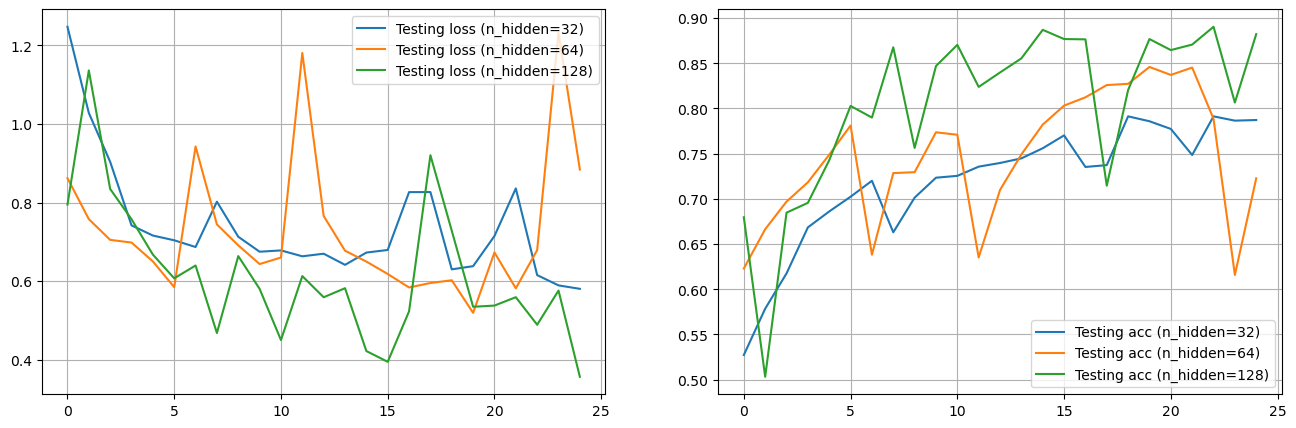

In [86]:
### START YOUR CODE
n_hidden_list = [32, 64, 128]
log_list = []

for n_hidden in n_hidden_list:
    model, log = train_simple_rnn(n_hidden=n_hidden, n_epochs=25)
    log_list.append(log)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for log, n_hidden in zip(log_list, n_hidden_list):
    axs[0].plot(log.history['val_loss'], label=f'Testing loss (n_hidden={n_hidden})')
    axs[1].plot(log.history['val_accuracy'], label=f'Testing acc (n_hidden={n_hidden})')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()

#### Findings
The performance is pretty shaky in all of the cases. We probably run into the vanishing gradient problem. Overall the model with the highest number of hidden units (128) seems to work best. It reaches a final accuracy of 0.8823 which is pretty respectable.

### LSTM

In [90]:
### START YOUR CODE

def train_simple_lstm(n_hidden, batch_size=128, n_epochs=25):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_normalized.shape[1], X_train_normalized.shape[2])))
    model.add(layers.LSTM(units=n_hidden))
    model.add(layers.Dense(units=N_CLASSES, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    model.summary()
    log = model.fit(X_train_normalized, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test_normalized, Y_test)
    )
    model.evaluate(x=X_test_normalized, y=Y_test)
    return model, log

### END YOUR CODE

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                5376      
                                                                 
 dense_19 (Dense)            (None, 6)                 198       
                                                                 
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
58/58 [==============================] - 3s 33ms/step - loss: 1.5168 - accuracy: 0.3993 - val_loss: 1.1906 - val_accuracy: 0.4981
Epoch 2/50
58/58 [==============================] - 1s 25ms/step - loss: 0.8742 - accuracy: 0.6809 - val_loss: 0.8122 - val_accuracy: 0.6722
Epoch 3/50
58/58 [==============================] - 1s 24ms/step - loss: 0.6603 - accuracy: 0.7601 - val_loss: 0.6857 - val_accuracy: 0.7313
Epoch 4/50
58/58 [======

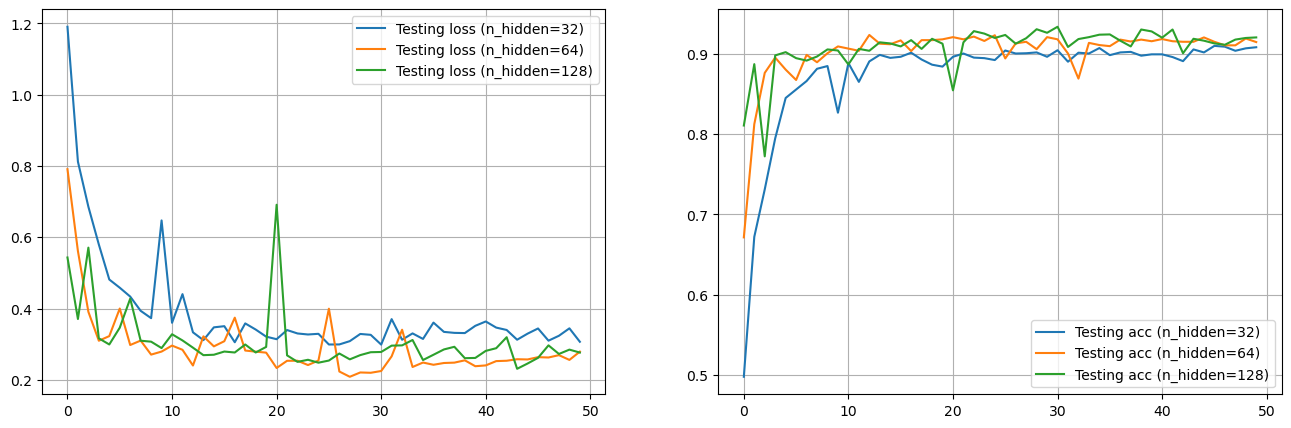

In [92]:
### START YOUR CODE
n_hidden_list = [32, 64, 128]
log_list = []

for n_hidden in n_hidden_list:
    model, log = train_simple_lstm(n_hidden=n_hidden, n_epochs=50)
    log_list.append(log)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for log, n_hidden in zip(log_list, n_hidden_list):
    axs[0].plot(log.history['val_loss'], label=f'Testing loss (n_hidden={n_hidden})')
    axs[1].plot(log.history['val_accuracy'], label=f'Testing acc (n_hidden={n_hidden})')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()

#### Findings
The performance is still a little bit wiggly but much better than with simple RNNs. The performance increased to 0.9203. Also in this case the model with most hidden layers performed best.

### Stacked LSTMs

In [93]:
### START YOUR CODE

def train_stacked_lstm(n_hidden, batch_size=128, n_epochs=25):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_normalized.shape[1], X_train_normalized.shape[2])))
    model.add(layers.LSTM(units=n_hidden, return_sequences=True))
    model.add(layers.LSTM(units=n_hidden, return_sequences=True))
    model.add(layers.LSTM(units=n_hidden))
    model.add(layers.Dense(units=N_CLASSES, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    model.summary()
    log = model.fit(X_train_normalized, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test_normalized, Y_test)
    )
    model.evaluate(x=X_test_normalized, y=Y_test)
    return model, log

### END YOUR CODE

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128, 32)           5376      
                                                                 
 lstm_5 (LSTM)               (None, 128, 32)           8320      
                                                                 
 lstm_6 (LSTM)               (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 6)                 198       
                                                                 
Total params: 22,214
Trainable params: 22,214
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
58/58 [==============================] - 7s 63ms/step - loss: 1.2590 - accuracy: 0.5229 - val_loss: 0.8589 - val_accuracy: 0.6671
Epoch 2/25
58/58 [======================

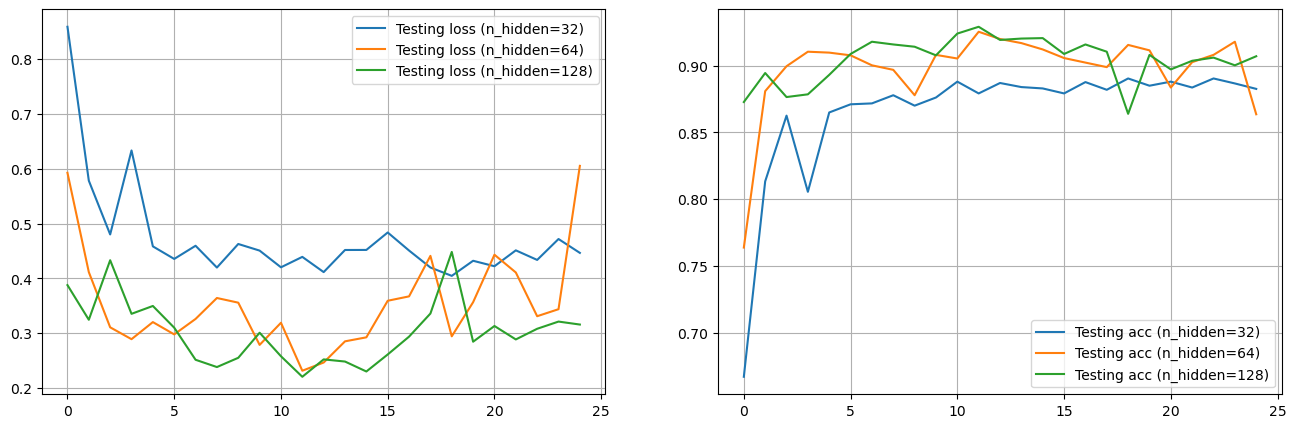

In [94]:
### START YOUR CODE
n_hidden_list = [32, 64, 128]
log_list = []

for n_hidden in n_hidden_list:
    model, log = train_stacked_lstm(n_hidden=n_hidden, n_epochs=25)
    log_list.append(log)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for log, n_hidden in zip(log_list, n_hidden_list):
    axs[0].plot(log.history['val_loss'], label=f'Testing loss (n_hidden={n_hidden})')
    axs[1].plot(log.history['val_accuracy'], label=f'Testing acc (n_hidden={n_hidden})')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()


#### Findings
Still wiggly as with single LSTM. Performance didn't really increase. Overall there is little difference between 64 and 128 hidden units.

### CNN (Conv1d)

In [102]:
### START YOUR CODE

def train_cnn(n_filters, dropout_rate, batch_size=128, n_epochs=25):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_normalized.shape[1], X_train_normalized.shape[2])))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Conv1D(filters=n_filters, kernel_size=3, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(units=N_CLASSES, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    model.summary()
    log = model.fit(X_train_normalized, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test_normalized, Y_test)
    )
    model.evaluate(x=X_test_normalized, y=Y_test)
    return model, log
### END YOUR CODE

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 126, 32)           896       
                                                                 
 conv1d_49 (Conv1D)          (None, 124, 32)           3104      
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 62, 32)           0         
 g1D)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 62, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_24 (Dropout)        (None, 62, 32)            0         
                                                                 
 conv1d_50 (Conv1D)          (None, 60, 32)          

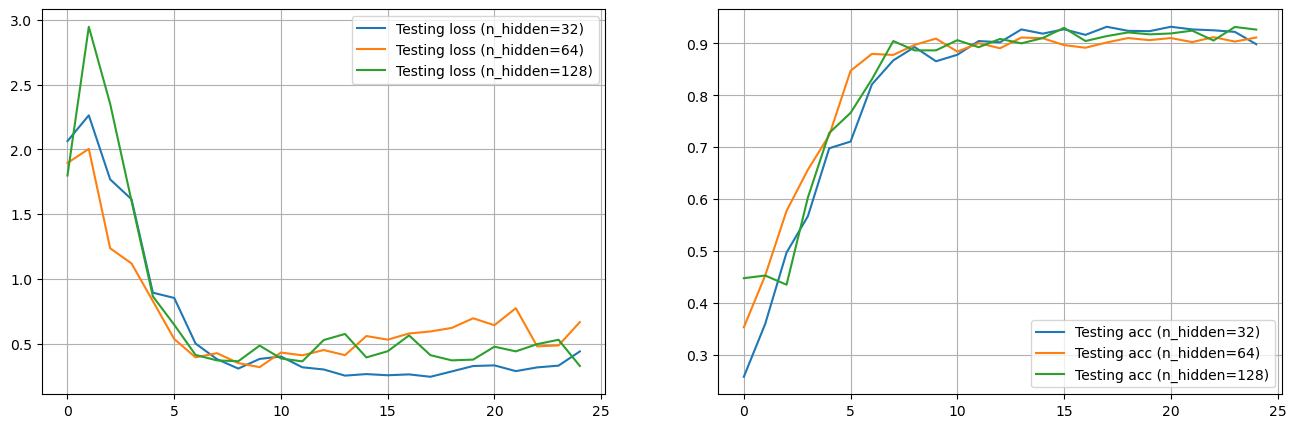

In [103]:
### START YOUR CODE
n_filters_list = [32, 64, 128]
log_list = []

for n_filters in n_filters_list:
    model, log = train_cnn(n_filters=n_filters, dropout_rate=0.5)
    log_list.append(log)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for log, n_filter in zip(log_list, n_filters_list):
    axs[0].plot(log.history['val_loss'], label=f'Testing loss (n_hidden={n_filter})')
    axs[1].plot(log.history['val_accuracy'], label=f'Testing acc (n_hidden={n_filter})')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()


#### Findings
The training is much faster than with LSTMs or with RNNs. The performance with 0.9267 accuracy is pretty good as well. In my opinion this is the most flexible model. It's also very easy to achieve a good performance (even with a more shallow model)

### MLP

In [107]:
### START YOUR CODE

def train_mlp(n_hidden, batch_size=128, n_epochs=25):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_normalized.shape[1], X_train_normalized.shape[2])))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=n_hidden, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Dense(units=n_hidden, activation="relu"))
    model.add(keras.layers.BatchNormalization())
    model.add(layers.Dense(units=n_hidden, activation="relu"))
    model.add(layers.Dense(units=N_CLASSES, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
    model.summary()
    log = model.fit(X_train_normalized, Y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          validation_data=(X_test_normalized, Y_test)
    )
    model.evaluate(x=X_test_normalized, y=Y_test)
    return model, log

### END YOUR CODE

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 1152)              0         
                                                                 
 dense_71 (Dense)            (None, 100)               115300    
                                                                 
 batch_normalization_32 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_72 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_33 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 dense_73 (Dense)            (None, 100)             

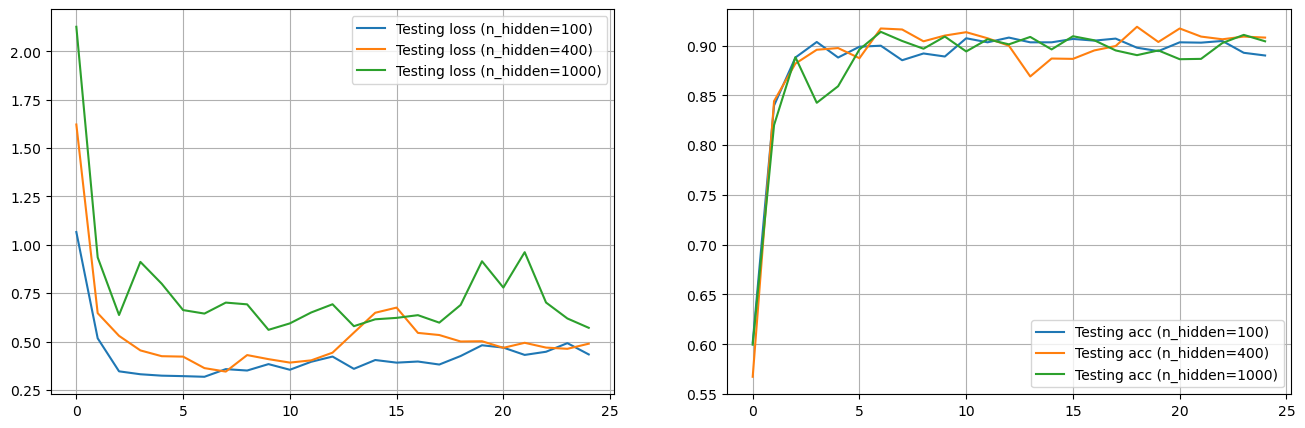

In [110]:
### START YOUR CODE
n_hidden_list = [100, 400, 1000]
log_list = []

for n_hidden in n_hidden_list:
    model, log = train_mlp(n_hidden=n_hidden, n_epochs=25)
    log_list.append(log)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
for log, n_hidden in zip(log_list, n_hidden_list):
    axs[0].plot(log.history['val_loss'], label=f'Testing loss (n_hidden={n_hidden})')
    axs[1].plot(log.history['val_accuracy'], label=f'Testing acc (n_hidden={n_hidden})')
axs[0].legend()
axs[0].grid()
axs[1].legend()
axs[1].grid()


#### Findings
The MLP model cannot learn temporal dependencies. But the performance is pretty good considering that fact, it gets up to 0.9080 with 400 hidden units. But I think the learning is limited here because of the restriction mentioned before.